## Load the data and simple visualisation

In [28]:
from load_oxford_flowers102 import load_oxford_flowers102
train_data, validation_data, test_data, class_names = load_oxford_flowers102(imsize=96, fine=False)
print(class_names)

['Orchids', 'Bell-shaped Flowers', 'Lilies', 'Tubular Flowers', 'Composite Flowers', 'Iris-like Flowers', 'Dahlia Varieties', 'Poppies', 'Water Flowers', 'Carnations']


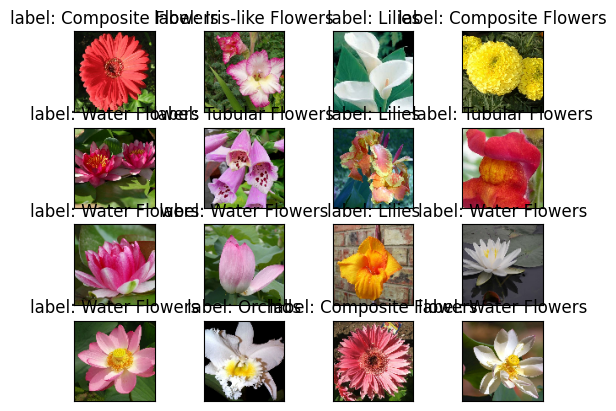

In [31]:
import show_methods
show_methods.show_data_images(train_data['images'][:16], train_data['labels'][:16], class_names=class_names)


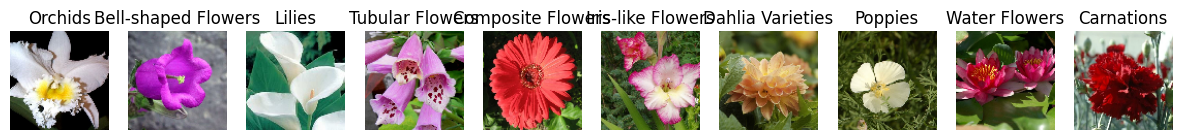

In [55]:
## entirely from chat gpt https://chat.openai.com/share/1af33729-d193-468f-9bf3-538617d3f3c5
import matplotlib.pyplot as plt

def print_examples_from_each_class(data, class_names):
    classes = len(class_names)
    fig, axs = plt.subplots(1, classes, figsize=(15, 3))
    
    for i in range(classes):
        # Find the first example of each class
        examples = [image for image, label in zip(data['images'], data['labels']) if label == i]
        if examples:
            axs[i].imshow(examples[0])
            axs[i].set_title(class_names[i])
            axs[i].axis('off')
    
    plt.show()

# Example usage:
train_data, validation_data, test_data, class_names = load_oxford_flowers102(imsize=96, fine=False)

print_examples_from_each_class(train_data, class_names)

## Analyse Class Imbalances

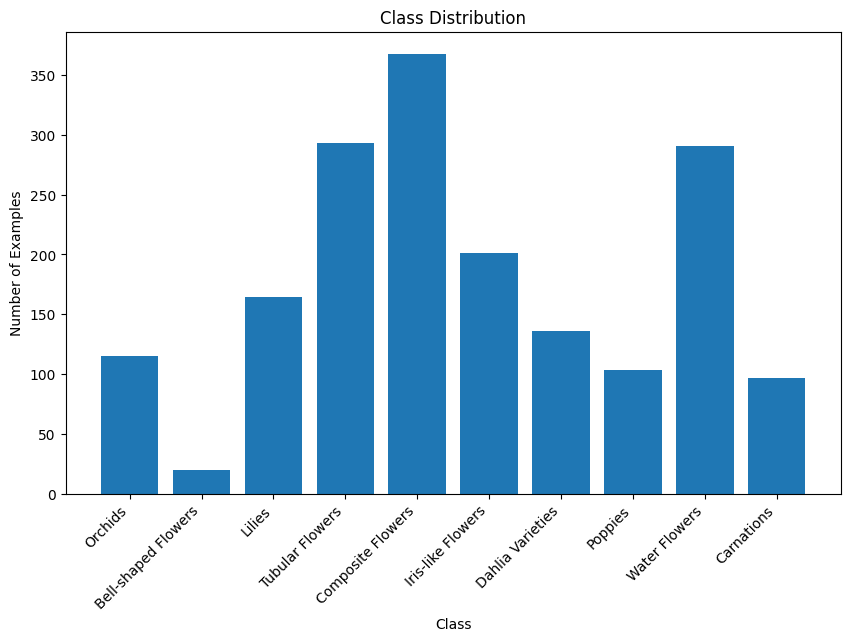

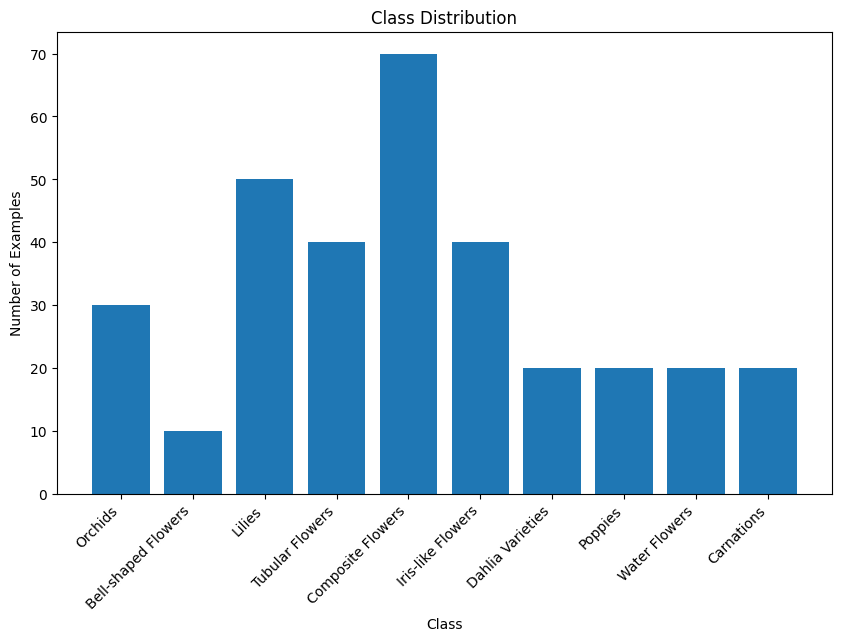

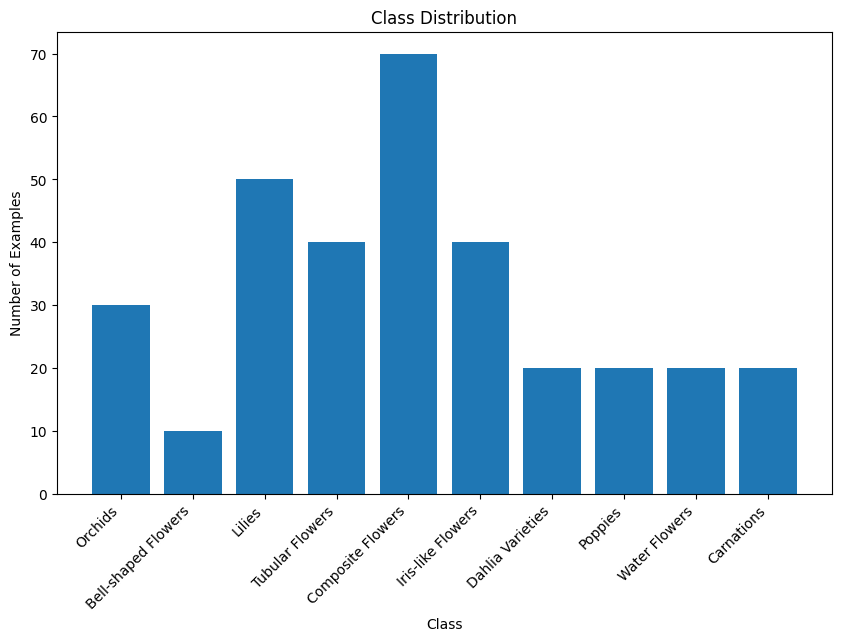

In [57]:
#from chat gpt https://chat.openai.com/share/1af33729-d193-468f-9bf3-538617d3f3c5
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(data, class_names):
    class_counts = {class_name: 0 for class_name in class_names}
    for label in data['labels']:
        class_counts[class_names[label]] += 1

    fig, ax = plt.subplots(figsize=(10, 6))
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    x = np.arange(len(classes))
    ax.bar(x, counts, align='center')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.set_ylabel('Number of Examples')
    ax.set_xlabel('Class')
    ax.set_title('Class Distribution')
    plt.show()

# Example usage:
train_data, validation_data, test_data, class_names = load_oxford_flowers102(imsize=96, fine=False)
plot_class_distribution(train_data, class_names)
plot_class_distribution(validation_data, class_names)
plot_class_distribution(test_data, class_names)


- classes are very imbalanced
- most images of composite flowers, very few images of bell shaped flowers
- validation and test data are similarly imbalanced but train data is imbalanced differently
- validation and test data have identical distribution. might be worth checking if the data is the same or not

## Inspect examples from each class

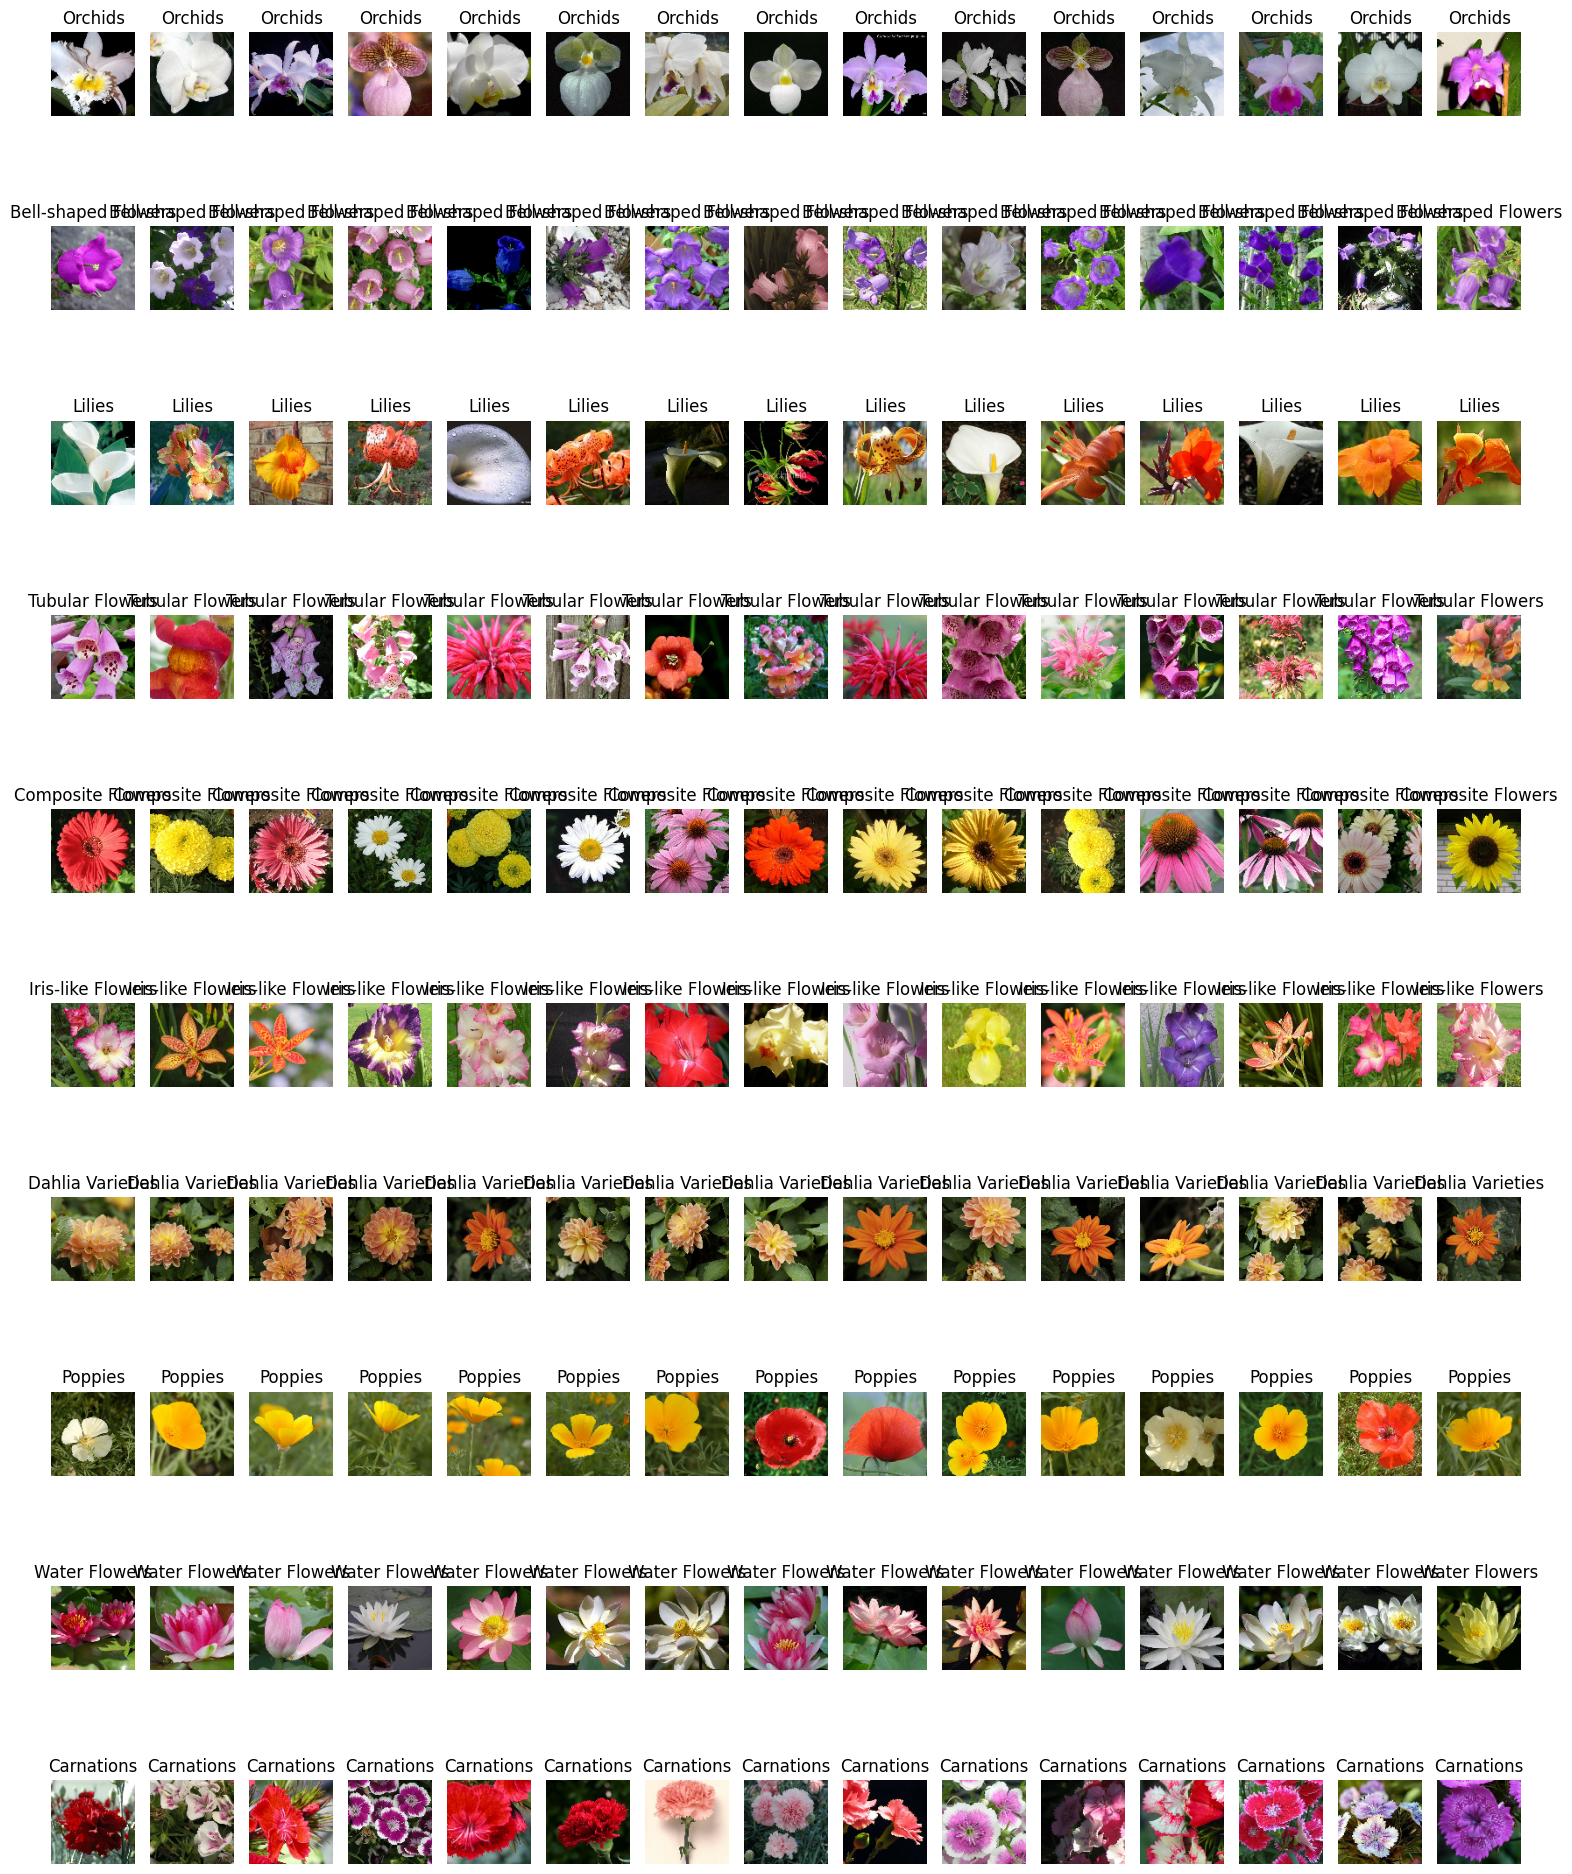

In [60]:
#from chat gpt https://chat.openai.com/share/1af33729-d193-468f-9bf3-538617d3f3c5
import matplotlib.pyplot as plt

def show_examples_of_each_class(data, class_names, num_examples=10):
    classes = len(class_names)
    fig, axs = plt.subplots(classes, num_examples, figsize=(15, 2 * classes))

    for i in range(classes):
        class_examples = [image for image, label in zip(data['images'], data['labels']) if label == i][:num_examples]
        for j, example in enumerate(class_examples):
            axs[i, j].imshow(example)
            axs[i, j].set_title(class_names[i])
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
train_data, validation_data, test_data, class_names = load_oxford_flowers102(imsize=96, fine=False)
show_examples_of_each_class(train_data, class_names, 15)


observations:
- many different backgrounds might confuse network. possible worth segmenting
- how much can we downscale images? 96 seems like plenty of resolution. might be possible to downscale
- no obvious duplicate examples
- what kind of data augmentation would be good?
    - horizontal flip ok
    - maybe not rgb shift because colour is important to classify
- no wide scale incorrect labels
- probably possible to classify off local features like petals rather than the whole flower.
    - possibly data aug by cropping?
- is it posible to classify without colour?? would this be interesting??